EC9630 Machine Learning - Laboratory 1

Task : Lab 2                      
Name : H.M.U.C.Herath                    
Reg No : 2021/E/049    
Date : 2025.01.28                  
Time : 01:00


# **Reading Data**

In [122]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [123]:
# Load dataset
data = pd.read_csv('hour.csv')

In [124]:
# Display first few rows
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# **Data Preprocessing**

In [125]:
# Drop unnecessary columns
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
data = data.drop(columns=columns_to_drop)

In [126]:
# Encoding categorical variables
data = pd.get_dummies(data, columns=["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"], drop_first=True)

In [127]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
temp            0
atemp           0
hum             0
windspeed       0
cnt             0
season_2        0
season_3        0
season_4        0
yr_1            0
mnth_2          0
mnth_3          0
mnth_4          0
mnth_5          0
mnth_6          0
mnth_7          0
mnth_8          0
mnth_9          0
mnth_10         0
mnth_11         0
mnth_12         0
hr_1            0
hr_2            0
hr_3            0
hr_4            0
hr_5            0
hr_6            0
hr_7            0
hr_8            0
hr_9            0
hr_10           0
hr_11           0
hr_12           0
hr_13           0
hr_14           0
hr_15           0
hr_16           0
hr_17           0
hr_18           0
hr_19           0
hr_20           0
hr_21           0
hr_22           0
hr_23           0
holiday_1       0
weekday_1       0
weekday_2       0
weekday_3       0
weekday_4       0
weekday_5       0
weekday_6       0
workingday_1    0
weathersit_2    0
weathersit_3    0
weathersit_4    0
dtype: int64

PreProcessing Data

1. Dropping Columns: instant, dteday, casual, and registered are redundant or leak target info (cnt).
Drop them using .drop().

2. Handling Missing Values:
Missing data breaks training, this dataset is usually clean, but we ensure robustness. Check with isnull().sum()

3. Encoding Categorical Variables:
Season, mnth, hr, weathersit are categorical, not continuous. one-hot encoding avoids ordinal assumptions.
Use pd.get_dummies(drop_first=True).

4. Feature Scaling:
Different scales (e.g., temp vs. windspeed) skew Linear Regression coefficients. Apply StandardScaler to numerical features post split.



# **Splitting the dataset**

In [128]:
# Splitting data into features and target

X = data.drop(columns=['cnt'])  # Features
y = data['cnt']  # Target

In [129]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Training a Linear Regression model**

In [130]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [131]:
# Predictions
y_pred = model.predict(X_test)

# **Evaluating performance**

In [132]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [133]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 74.10515899029578
Mean Squared Error: 10089.38811515939
Root Mean Squared Error: 100.44594623557185


**Mean Absolute Error (MAE):** Measures the average absolute difference between actual and predicted values


**Mean Squared Error (MSE):** Penalizes larger errors more by squaring them.


**Root Mean Squared Error (RMSE):** The square root of MSE, keeping it in the same unit as the target variable.


These metrics help assess how well the model generalizes to unseen data.

# Comparing actual vs. predicted values

In [134]:
# Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison_df)

      Actual   Predicted
0        425  449.019725
1         88  162.381628
2          4    5.145481
3        526  432.178470
4         13  -68.797886
...      ...         ...
3471      17   35.381947
3472      85   46.087304
3473      98   87.308601
3474     266  200.054275
3475     267  256.899125

[3476 rows x 2 columns]


# **Plotting the resultst**

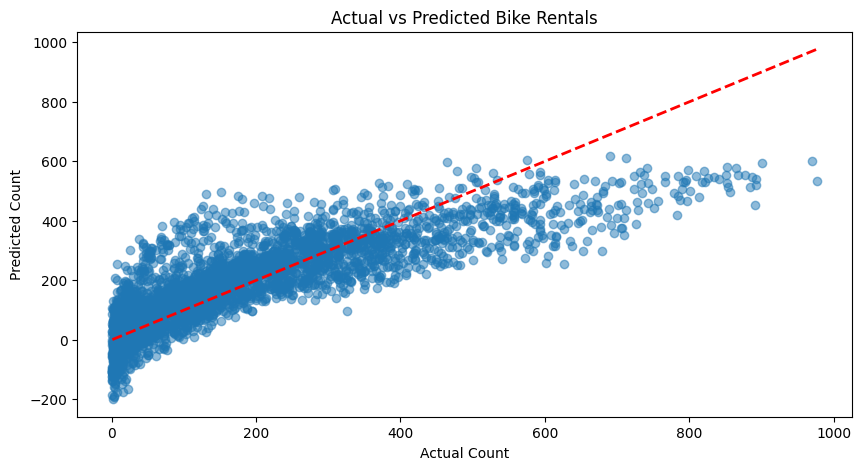

In [135]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Actual vs Predicted Bike Rentals")
plt.show()

# **Regularization Apply**

In [136]:
from sklearn.linear_model import Ridge, Lasso

Lasso (L1) Regularization:
Mean Absolute Error: 74.00379014087602
Mean Squared Error: 10109.115426452863
Root Mean Squared Error: 100.54409692494563

Ridge (L2) Regularization:
Mean Absolute Error: 74.10189375543025
Mean Squared Error: 10088.426769163443
Root Mean Squared Error: 100.44116073186053

Comparison with Lasso (L1) Regularization:
   Actual  Predicted (Lasso)
0     425         444.436845
1      88         164.506058
2       4           5.503023
3     526         433.181164
4      13         -32.104610

Comparison with Ridge (L2) Regularization:
   Actual  Predicted (Ridge)
0     425         449.006597
1      88         162.359376
2       4           5.157608
3     526         432.168621
4      13         -68.249306


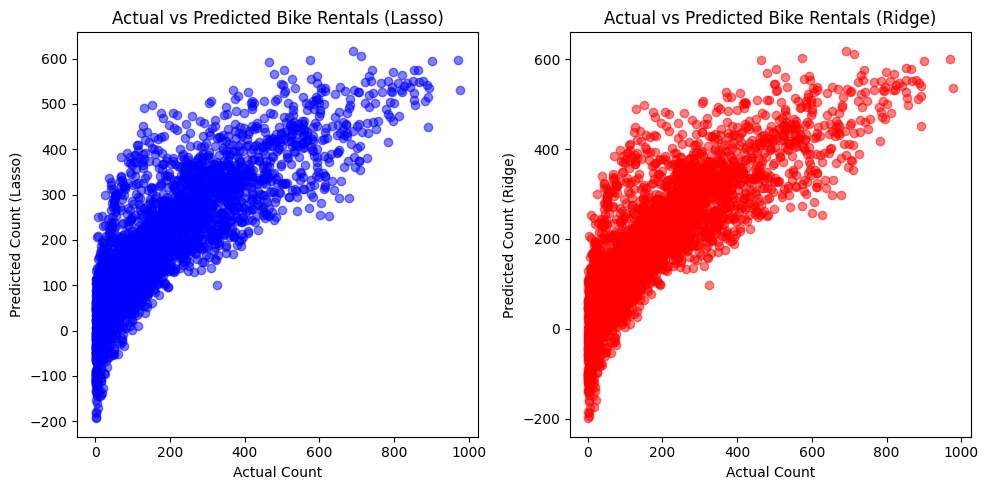

In [137]:
from sklearn.linear_model import Lasso, Ridge

# L1 Regularization (Lasso)
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength; you can adjust it
lasso.fit(X_train, y_train)

# Predictions with Lasso
y_pred_lasso = lasso.predict(X_test)

# Evaluation for Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print(f"Lasso (L1) Regularization:")
print(f"Mean Absolute Error: {mae_lasso}")
print(f"Mean Squared Error: {mse_lasso}")
print(f"Root Mean Squared Error: {rmse_lasso}")

# L2 Regularization (Ridge)
ridge = Ridge(alpha=0.1)  # alpha is the regularization strength; you can adjust it
ridge.fit(X_train, y_train)

# Predictions with Ridge
y_pred_ridge = ridge.predict(X_test)

# Evaluation for Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"\nRidge (L2) Regularization:")
print(f"Mean Absolute Error: {mae_ridge}")
print(f"Mean Squared Error: {mse_ridge}")
print(f"Root Mean Squared Error: {rmse_ridge}")

# Compare Actual vs Predicted for Lasso and Ridge
comparison_lasso_df = pd.DataFrame({'Actual': y_test.values, 'Predicted (Lasso)': y_pred_lasso})
comparison_ridge_df = pd.DataFrame({'Actual': y_test.values, 'Predicted (Ridge)': y_pred_ridge})

print("\nComparison with Lasso (L1) Regularization:")
print(comparison_lasso_df.head())

print("\nComparison with Ridge (L2) Regularization:")
print(comparison_ridge_df.head())

# Plot Actual vs Predicted for Lasso and Ridge
plt.figure(figsize=(10, 5))

# Lasso
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='blue')
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count (Lasso)")
plt.title("Actual vs Predicted Bike Rentals (Lasso)")

# Ridge
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='red')
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count (Ridge)")
plt.title("Actual vs Predicted Bike Rentals (Ridge)")

plt.tight_layout()
plt.show()

**Ridge Regression (L2 Regularization):** Shrinks large coefficients to mitigate overfitting by adding a penalty term proportional to the sum of squared coefficients.


**Lasso Regression (L1 Regularization):** Encourages sparsity by shrinking some coefficients to exactly zero, effectively performing feature selection.


The alpha parameter adjusts the regularization strength higher values increase the penalty, leading to greater coefficient shrinkage.


Ridge regression reduces overfitting by constraining coefficient magnitudes, while Lasso regression can exclude irrelevant features by nullifying their coefficients.


By comparing Mean Squared Error(MSE)  and Root Mean Squared Error(RMSE) , we evaluate how regularization impacts model accuracy. A decrease in test error with Ridge or Lasso compared to standard Linear Regression suggests that overfitting was present in the unregularized model.




In [138]:
coefficients_lr = model.coef_
coefficients_ridge = ridge_model.coef_

coefficients_lr = model.coef_
coefficients_lasso = lasso_model.coef_

In [139]:
indices = range(len(coefficients_lr))

# **Plot Coefficients**

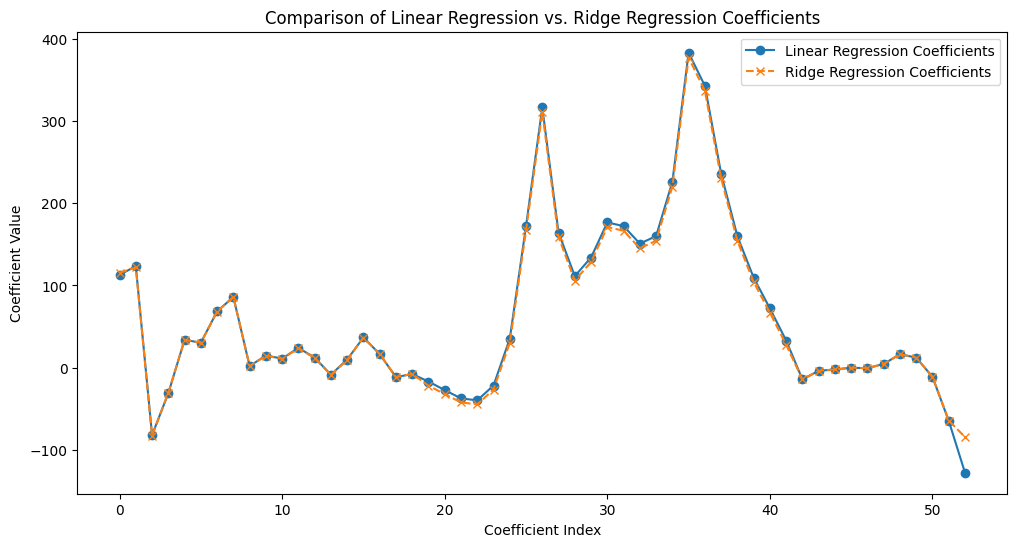

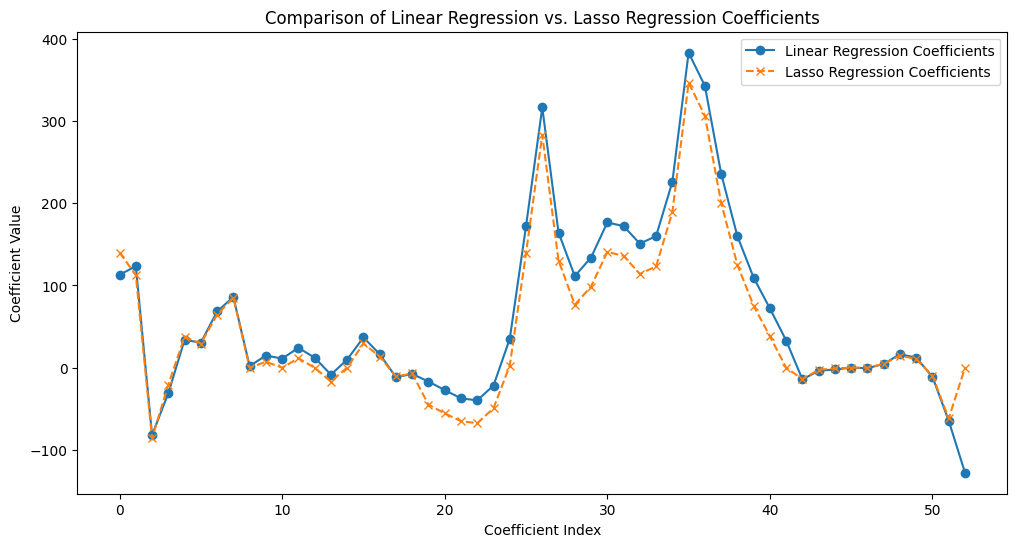

In [140]:
plt.figure(figsize=(12, 6))
plt.plot(indices, coefficients_lr, marker='o', linestyle='-', label='Linear Regression Coefficients')
plt.plot(indices, coefficients_ridge, marker='x', linestyle='--', label='Ridge Regression Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Linear Regression vs. Ridge Regression Coefficients")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(indices, coefficients_lr, marker='o', linestyle='-', label='Linear Regression Coefficients')
plt.plot(indices, coefficients_lasso, marker='x', linestyle='--', label='Lasso Regression Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Linear Regression vs. Lasso Regression Coefficients")
plt.legend()
plt.show()

# **Plot the differences between the coefficients**

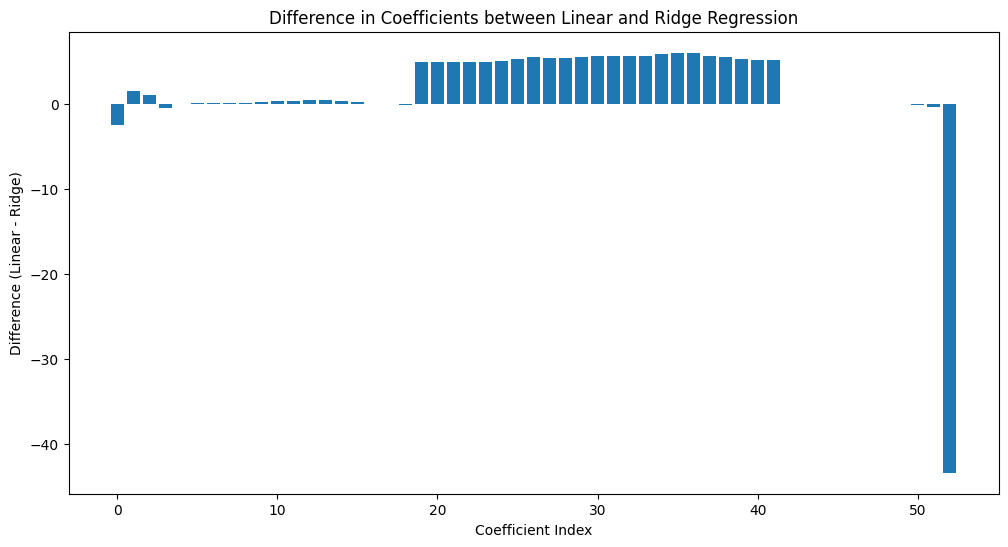

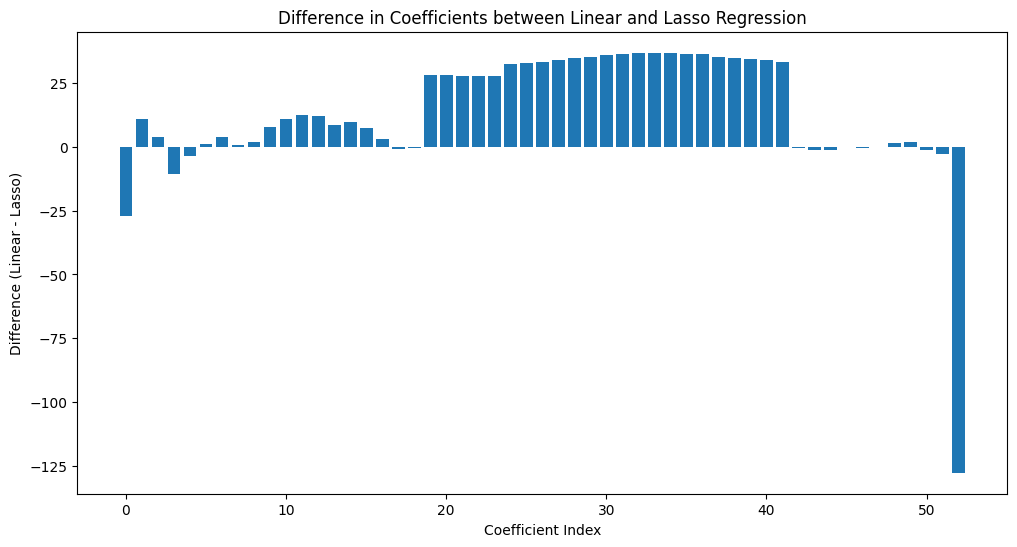

In [141]:
coeff_diff = coefficients_lr - coefficients_ridge
plt.figure(figsize=(12, 6))
plt.bar(indices, coeff_diff)
plt.xlabel("Coefficient Index")
plt.ylabel("Difference (Linear - Ridge)")
plt.title("Difference in Coefficients between Linear and Ridge Regression")
plt.show()

coeff_diff = coefficients_lr - coefficients_lasso
plt.figure(figsize=(12, 6))
plt.bar(indices, coeff_diff)
plt.xlabel("Coefficient Index")
plt.ylabel("Difference (Linear - Lasso)")
plt.title("Difference in Coefficients between Linear and Lasso Regression")
plt.show()